In [173]:
import os
import sys

sys.path.append("..")
os.chdir("/home/sean/HAI/main_server/hai")
from controllers.learner.datasets import get_image_data

import time
data = get_image_data("sean", start_time=time.time()-10000, end_time=time.time())

In [174]:
import numpy as np

image_fns = [d["image_features_filename"] for d in data if "image_features_filename" in d]
image_features = [np.load("./image_features/" + fn) for fn in image_fns]

In [175]:
image_features = [np.max(v, axis=(0,1)) for v in image_features]

In [176]:
len(image_features)

330

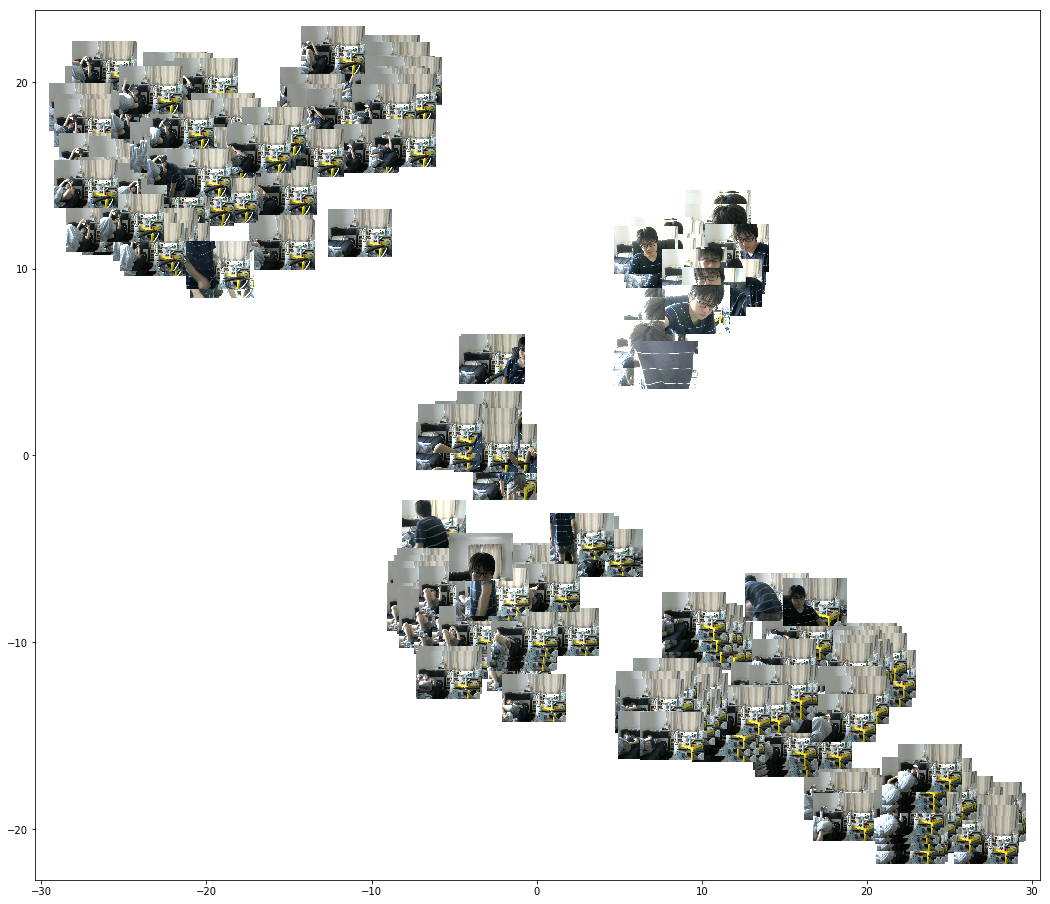

In [177]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.misc import imread
%matplotlib inline

tsne = TSNE(n_components=2)
x = tsne.fit_transform(image_features)

plt.figure(figsize=(18, 16))
ax = plt.gca()

for i, xx in enumerate(x):
    img = imread("images/raw_images/" + data[i]["filename"])
    im = OffsetImage(img, zoom=0.1)
    ab = AnnotationBbox(im, (xx[0], xx[1]), xycoords='data', frameon=False)
    ax.add_artist(ab)

ax.update_datalim(x)
ax.autoscale()
plt.show()

In [182]:
def get_person(d):
    pick, conf = None, 0.9
    for obj in d["detections"]:
        if "label" in obj and obj["label"] == "person" and obj["confidence"] > conf:
            pick = obj
            conf = obj["confidence"]
    return pick

In [183]:
objects, imgs = [], []

for d in data:
    person = get_person(d)
    if person is not None:
        feats = np.load("object_features/" + d["object_features_filename"])
        objects.append(feats[person["list_index"]])
        imgs.append([d["filename"], person["box"]])

213


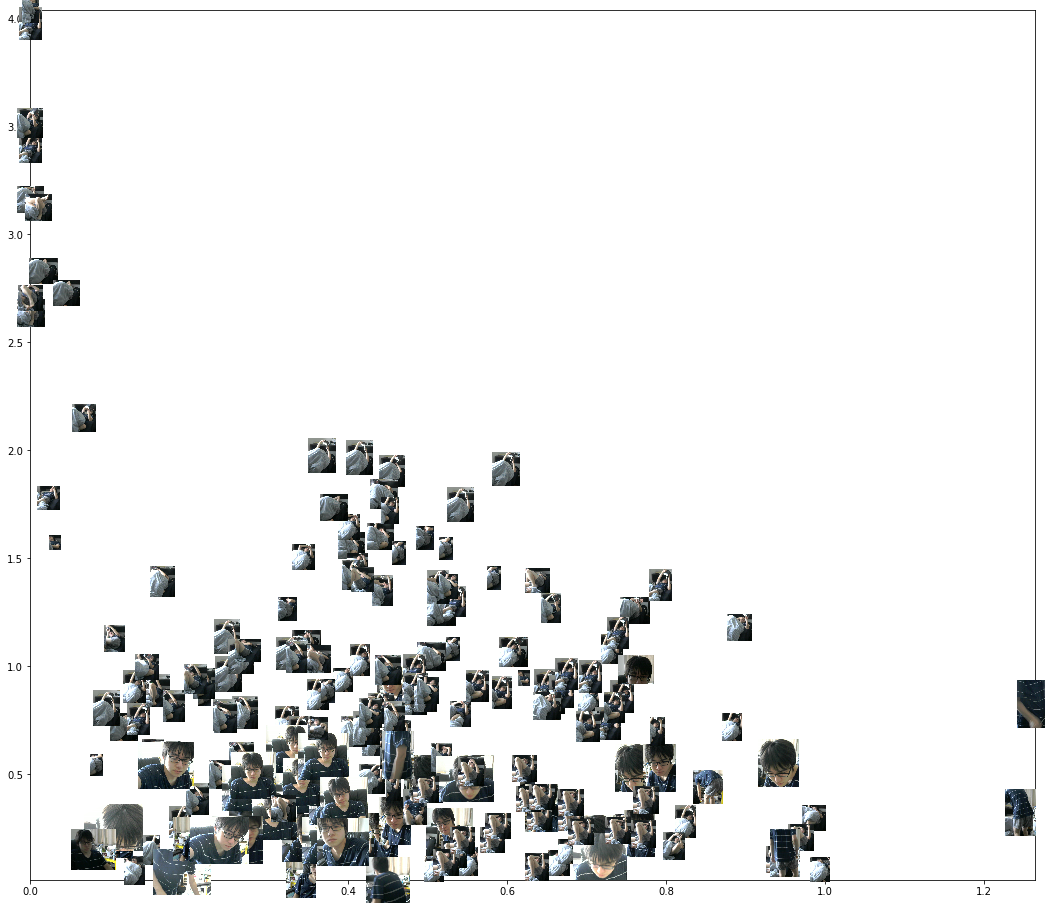

In [184]:
objects = np.array(objects)

tsne = TSNE(n_components=2, n_iter=1000)
x = tsne.fit_transform(objects)

fig2 = plt.figure(figsize=(18, 16))
plt.clf()
ax2 = fig2.add_subplot(111)

for xx, d in zip(objects, imgs):
    img = imread("images/raw_images/" + d[0])
    b = d[1]
    img = img[b[1]:b[3], b[0]:b[2],:]
    im = OffsetImage(img, zoom=0.1)
    ab = AnnotationBbox(im, (xx[0], xx[1]), xycoords='data', frameon=False)
    ax2.add_artist(ab)
    
print(len(objects))

ax2.update_datalim(x)
ax2.autoscale(tight=True)
ax2.autoscale_view()
plt.xlim((np.min(objects[:,0]), np.max(objects[:,0])))
plt.ylim((np.min(objects[:,1]), np.max(objects[:,1])))
plt.show()

330


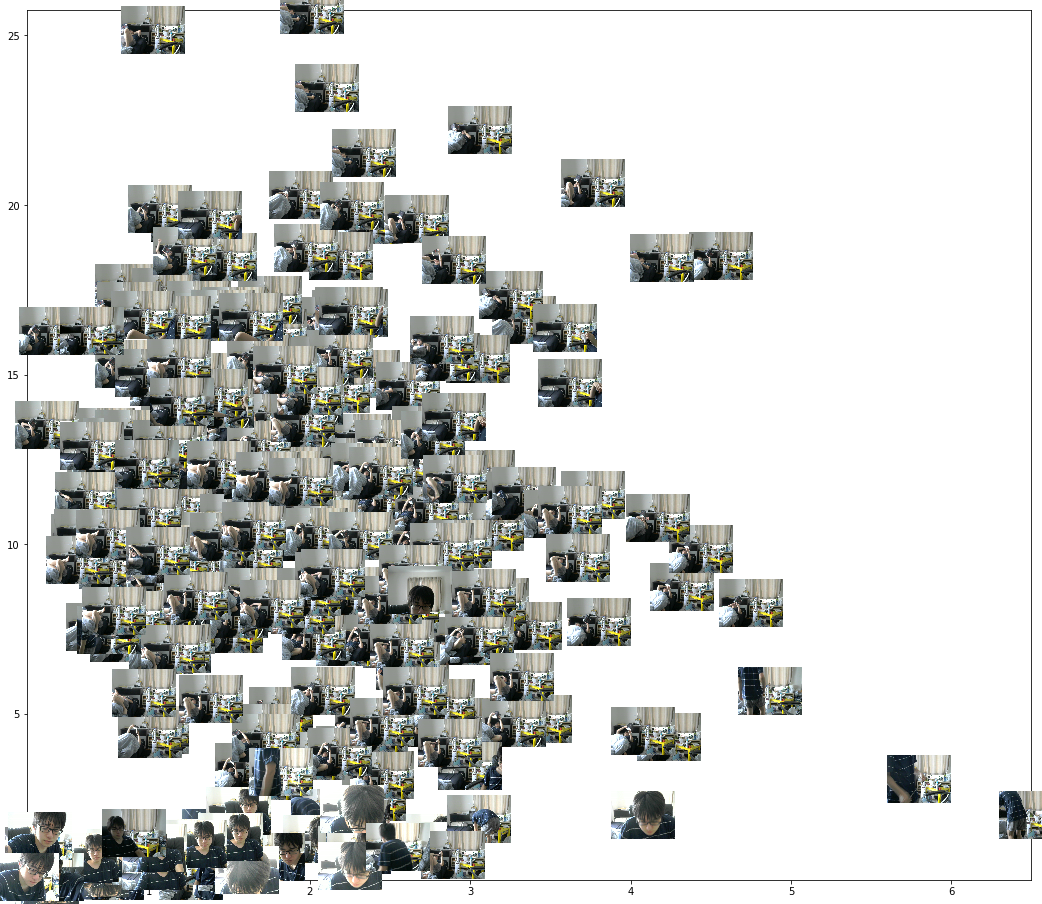

In [185]:
objects, imgs = [], []

for d in data:
    if "object_features_filename" in d:
        feats = np.load("object_features/" + d["object_features_filename"])
        bag = np.sum(feats, axis=0)
        if len(bag.shape) == 1:
            objects.append(bag)
            imgs.append(d["filename"])

objects = np.array(objects)

tsne = TSNE(n_components=2, n_iter=1000)
x = tsne.fit_transform(objects)

fig2 = plt.figure(figsize=(18, 16))
plt.clf()
ax2 = fig2.add_subplot(111)

for xx, d in zip(objects, imgs):
    img = imread("images/raw_images/" + d)
    im = OffsetImage(img, zoom=0.1)
    ab = AnnotationBbox(im, (xx[0], xx[1]), xycoords='data', frameon=False)
    ax2.add_artist(ab)
    
print(len(objects))

ax2.update_datalim(x)
ax2.autoscale(tight=True)
ax2.autoscale_view()
plt.xlim((np.min(objects[:,0]), np.max(objects[:,0])))
plt.ylim((np.min(objects[:,1]), np.max(objects[:,1])))
plt.show() 